<a href="https://colab.research.google.com/github/MarcoParola/medical_images_classification/blob/main/BaseLine4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import collections 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn import metrics

In [ ]:
projectPath = 'drive/MyDrive/Colab Notebooks/cidl/'
dataPath = 'numpy data/'

In [ ]:
%cd $projectPath
%run utils.ipynb
%cd '../../../..'

/content/drive/.shortcut-targets-by-id/1H_qsSPBi-K_nGcMzSsNcwFkqtAHG8iYD/cidl
/content


In [ ]:
# load data
imagesTrainPub, labelsTrainPub, imagesTestPub, labelsTestPub, imagesTestPriv = load_data(projectPath + dataPath)

# normalize data 
imagesTrainPub = scaleData(imagesTrainPub)
imagesTestPub = scaleData(imagesTestPub)

In [ ]:
# create (if not exists) the folder to store the models
dir_name = 'models/task3_1/'
if not os.path.exists(projectPath + dir_name):
  os.makedirs(projectPath + dir_name)

In [ ]:
np.random.seed(33)
#tf.random.set_seed(7)

# **Task 4**

## 4 Binary calssification: Benign and Malignant, exploiting **baseline patches**
Classes:
*   Benign 
*   Malignant

In [ ]:
# 0 -> benign
# 1 -> malignant

# prepare trainig-set
trainingSet = []
trainingLabels = []
baseline = []
benignNum = 0
malignantNum = 0

benign = []
malignant = []

for i in range(len(labelsTrainPub)):
  if labelsTrainPub[i] == 1 or labelsTrainPub[i] == 3:
    trainingSet.append(imagesTrainPub[i])
    trainingLabels.append(0)
    benignNum = benignNum + 1
    benign.append(imagesTrainPub[i])
  if labelsTrainPub[i] == 2 or labelsTrainPub[i] == 4:
    trainingSet.append(imagesTrainPub[i])
    trainingLabels.append(1)
    malignantNum = malignantNum + 1
    malignant.append(imagesTrainPub[i])
  if labelsTrainPub[i] == 0:
    baseline.append(imagesTrainPub[i])
    
trainingSet = np.array(trainingSet)
trainingSet = trainingSet.reshape(2676, 150, 150, 1)

baseline = np.array(baseline)
baseline = baseline.reshape(2676, 150, 150, 1)

training = []
for i in range(len(trainingSet)):
  training.append((trainingSet[i], trainingLabels[i], baseline[i]))

training = np.array(training)
np.random.shuffle(training)


trainingSet = []
trainingLabels = []
baseline = []

for i in range(len(training)):
  trainingSet.append(training[i][0])
  trainingLabels.append(training[i][1])
  baseline.append(training[i][2])

trainingSet = np.array(trainingSet)
trainingLabels = np.array(trainingLabels)
baseline = np.array(baseline)

# prepare test-set
testSet = []
testLabels = []
testBaseline = []

for i in range(len(labelsTestPub)):
  if labelsTestPub[i] == 1 or labelsTestPub[i] == 3:
    testSet.append(imagesTestPub[i])
    testLabels.append(0)
  if labelsTestPub[i] == 2 or labelsTestPub[i] == 4:
    testSet.append(imagesTestPub[i])
    testLabels.append(1)
  if labelsTrainPub[i] == 0:
    testBaseline.append(imagesTestPub[i])

testBaseline = np.array(testBaseline)
testBaseline = testBaseline.reshape(336, 150, 150, 1)

testSet = np.array(testSet)
testSet = testSet.reshape(336, 150, 150, 1)

# the output must have a categorigal values
testLabelsCategorical = to_categorical(np.array(testLabels))
trainingLabelsCategorical = to_categorical(np.array(trainingLabels))
# classes to be passed to the function plotting the confusion matrix
classes = ['benign', 'malignant']

testLabelsNp = np.array(testLabels)
trainingSet = np.array(training)
testSet = np.array(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


# **Augment Data**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 64
dataGenerator = ImageDataGenerator(
      rotation_range=45,
      width_shift_range=0.15,
      height_shift_range=0.15,
      shear_range=20,
      zoom_range=0.15,
      horizontal_flip=True,
      fill_mode='reflect')


augmentedData = []

augmentedLabels = []

for j in range(0,len(trainingSet)):
  for i in range(0,3):
    dataGenerated = dataGenerator.flow(trainingSet[j].reshape(1,150,150,1), batch_size=4)
    augmentedData.append(dataGenerated[0].reshape(150, 150))
    augmentedLabels.append(trainingLabels[j])
    del dataGenerated

augmentedLabels = to_categorical((np.array(augmentedLabels)))

augmentedData = np.array(augmentedData)
augmentedData = augmentedData.reshape(len(augmentedData), 150, 150, 1)
print(augmentedData.shape, augmentedLabels.shape)


(8028, 150, 150, 1) (8028, 2)


# **Siamese network (concatenate)** 
## learning rate = 2e-5





In [ ]:
testSet = np.repeat(testSet, 3, axis = 3)
trainingSet = np.repeat(trainingSet, 3, axis = 3)
baseline = np.repeat(baseline, 3, axis = 3)
testBaseline = np.repeat(testBaseline, 3, axis = 3)
# servono?
baselineArray = np.asarray(baseline)
testBaselineArray = np.asarray(testBaseline)
testSetArray = np.asarray(testSet)

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       219
           1       0.51      0.55      0.53       117

    accuracy                           0.66       336
   macro avg       0.63      0.63      0.63       336
weighted avg       0.66      0.66      0.66       336

11/11 [==============================] - 1s 130ms/step - loss: 0.5943 - accuracy: 0.6577
0.5943328142166138 0.6577380895614624


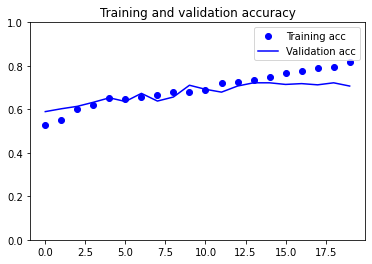

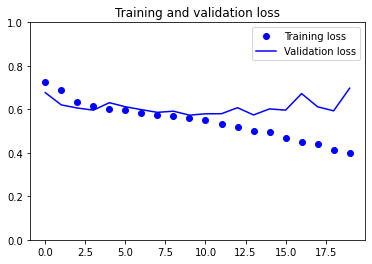

In [ ]:
from tensorflow.keras.applications import VGG16
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras import backend as K

tf.random.set_seed(7)

input_shape = (150,150,3)
left_input = Input(input_shape)
right_input = Input(input_shape)
    


conv_base = VGG16(weights='imagenet',
              include_top=False,
              input_shape=(150, 150, 3))

siamese_concat = models.Sequential()
siamese_concat.add(conv_base)
siamese_concat.add(layers.Flatten())

# Generate the encodings (feature vectors) for the two images
encoded_l = siamese_concat(left_input)
encoded_r = siamese_concat(right_input)


L1_concatenate = tf.keras.layers.Concatenate()([encoded_l, encoded_r])

pred1 = layers.Dense(512,activation='relu')(L1_concatenate)
predDropout1 = layers.Dropout(rate=.5)(pred1)
pred2 = layers.Dense(256,activation='relu')(predDropout1)
predDropout2 = layers.Dropout(rate=.5)(pred2)
pred3 = layers.Dense(1, activation = 'sigmoid')(predDropout2)

# Connect the inputs with the outputs
siamese_concat = models.Model(inputs=[left_input,right_input],outputs=pred3)

siamese_concat.summary()
siamese_concat.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights = True)

history = siamese_concat.fit([trainingSet, baseline], trainingLabels, epochs=100, batch_size=32, callbacks=[earlyStopCallback], validation_split=0.2)



pred = siamese_concat.predict([testSet, testBaseline])
pred = np.where(pred < 0.5, 0, 1)
print(metrics.classification_report(testLabels, pred))
test_loss, test_acc = siamese_concat.evaluate([testSet, testBaseline], testLabelsNp)
print(test_loss, test_acc)
plot_accurancy_loss(history)

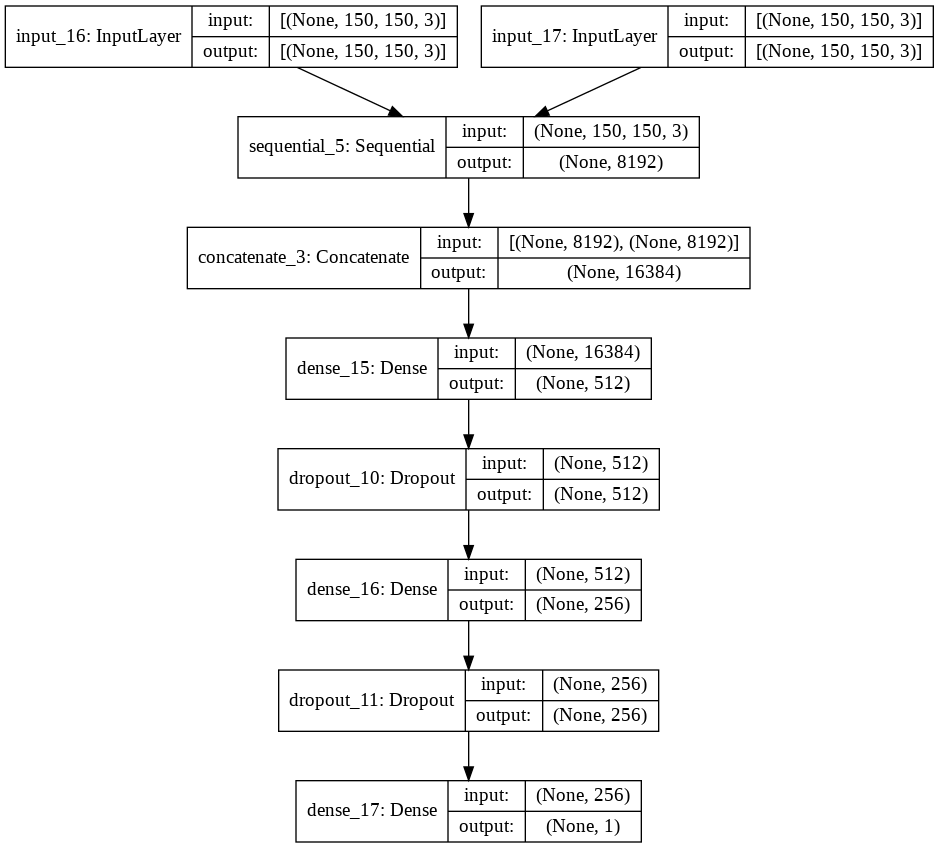

In [ ]:

tf.keras.utils.plot_model(siamese_concat, show_shapes=True)

# **Siamese architecture (difference)**

##learning rate = 2e-5

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 8192)         14714688    input_4[0][0]                    
                                                                 input_5[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 8192)         0           sequential_1[0][0]         

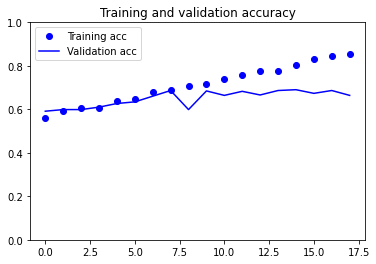

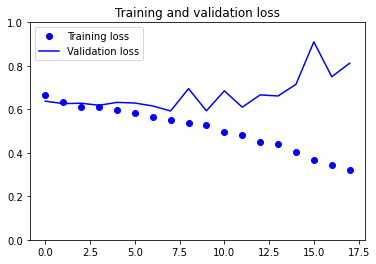

In [ ]:
from tensorflow.keras.applications import VGG16
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras import backend as K

tf.random.set_seed(7)

input_shape = (150,150,3)
left_input = Input(input_shape)
right_input = Input(input_shape)
    


conv_base = VGG16(weights='imagenet',
              include_top=False,
              input_shape=(150, 150, 3))

siamese_diff = models.Sequential()
siamese_diff.add(conv_base)
siamese_diff.add(layers.Flatten())

# Generate the encodings (feature vectors) for the two images
encoded_l = siamese_diff(left_input)
encoded_r = siamese_diff(right_input)

# Add a customized layer to compute the absolute difference between the encodings
L1_layer = layers.Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_l, encoded_r])

pred1 = layers.Dense(512,activation='relu')(L1_distance)
predDropout1 = layers.Dropout(rate=.5)(pred1)
pred2 = layers.Dense(256,activation='relu')(predDropout1)
predDropout2 = layers.Dropout(rate=.5)(pred2)
pred3 = layers.Dense(1, activation = 'sigmoid')(predDropout2)

# Connect the inputs with the outputs
siamese_diff = models.Model(inputs=[left_input,right_input],outputs=pred3)

siamese_diff.summary()
siamese_diff.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights = True)

history = siamese_diff.fit([trainingSet, baseline], trainingLabels, epochs=100, batch_size=32, callbacks=[earlyStopCallback], validation_split=0.2)



pred = siamese_diff.predict([testSet, testBaseline])
pred = np.where(pred < 0.5, 0, 1)
print(metrics.classification_report(testLabels, pred))
test_loss, test_acc = siamese_diff.evaluate([testSet, testBaseline], testLabelsNp)
print(test_loss, test_acc)
plot_accurancy_loss(history)

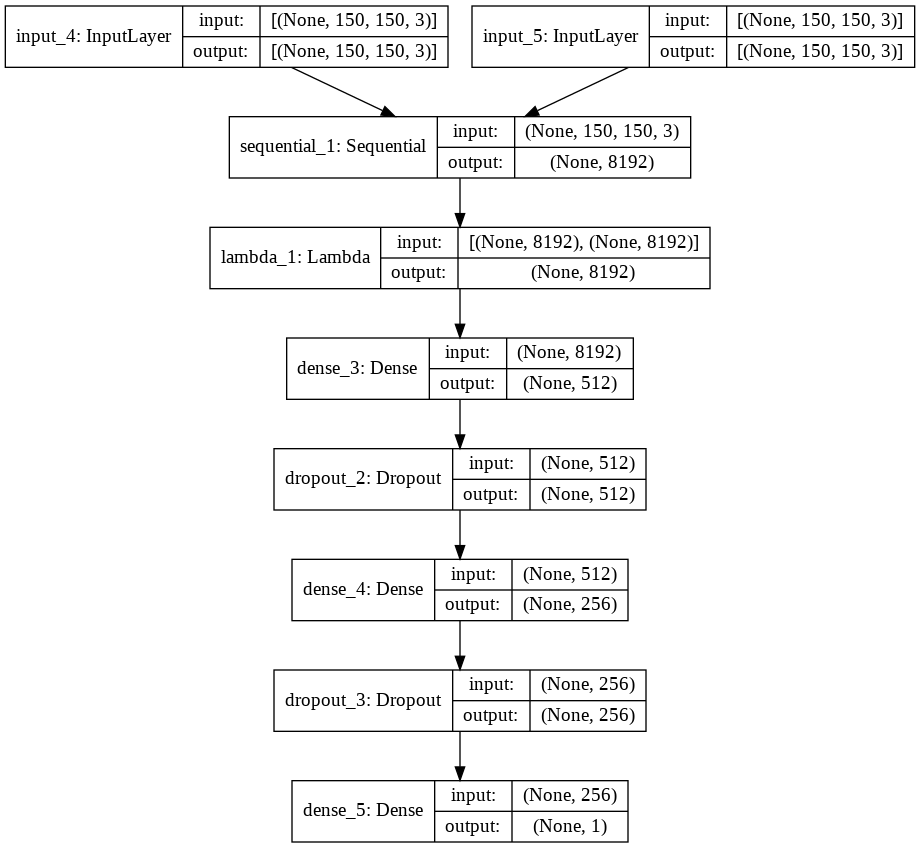

In [ ]:
tf.keras.utils.plot_model(siamese_diff, show_shapes=True)

# **Siamese network (concatenate)**

## learning rate = 2e-6

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 8192)         14714688    input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 16384)        0           sequential_2[0][0]         

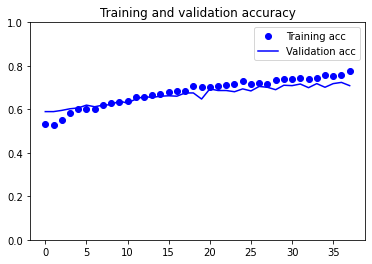

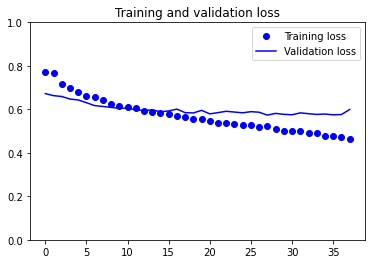

In [ ]:
from tensorflow.keras.applications import VGG16
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras import backend as K

tf.random.set_seed(7)

input_shape = (150,150,3)
left_input = Input(input_shape)
right_input = Input(input_shape)
    


conv_base = VGG16(weights='imagenet',
              include_top=False,
              input_shape=(150, 150, 3))

siamese_concat2 = models.Sequential()
siamese_concat2.add(conv_base)
siamese_concat2.add(layers.Flatten())

# Generate the encodings (feature vectors) for the two images
encoded_l = siamese_concat2(left_input)
encoded_r = siamese_concat2(right_input)

# Add a customized layer to compute the absolute difference between the encodings
L1_concatenate = tf.keras.layers.Concatenate()([encoded_l, encoded_r])

pred1 = layers.Dense(512,activation='relu')(L1_concatenate)
predDropout1 = layers.Dropout(rate=.5)(pred1)
pred2 = layers.Dense(256,activation='relu')(predDropout1)
predDropout2 = layers.Dropout(rate=.5)(pred2)
pred3 = layers.Dense(1, activation = 'sigmoid')(predDropout2)

# Connect the inputs with the outputs
siamese_concat2 = models.Model(inputs=[left_input,right_input],outputs=pred3)

siamese_concat2.summary()
siamese_concat2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-6),
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights = True)

history = siamese_concat2.fit([trainingSet, baseline], trainingLabels, epochs=100, batch_size=32, callbacks=[earlyStopCallback], validation_split=0.2)



pred = siamese_concat2.predict([testSet, testBaseline])
pred = np.where(pred < 0.5, 0, 1)
print(metrics.classification_report(testLabels, pred))
test_loss, test_acc = siamese_concat2.evaluate([testSet, testBaseline], testLabelsNp)
print(test_loss, test_acc)
plot_accurancy_loss(history)

# **Siamese network (difference)**

## learning rate = 2e-6



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 8192)         14714688    input_10[0][0]                   
                                                                 input_11[0][0]                   
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 8192)         0           sequential_3[0][0]         

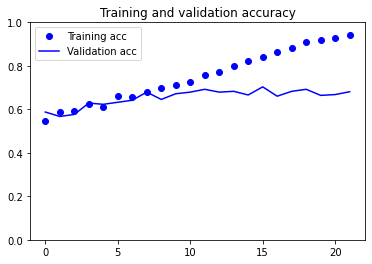

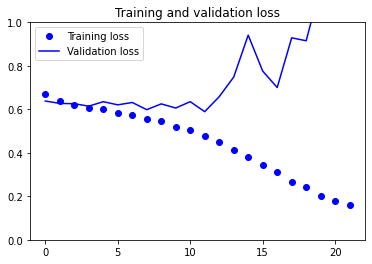

In [ ]:
from tensorflow.keras.applications import VGG16
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras import backend as K

tf.random.set_seed(7)

input_shape = (150,150,3)
left_input = Input(input_shape)
right_input = Input(input_shape)
    


conv_base = VGG16(weights='imagenet',
              include_top=False,
              input_shape=(150, 150, 3))

siamese_diff2 = models.Sequential()
siamese_diff2.add(conv_base)
siamese_diff2.add(layers.Flatten())

# Generate the encodings (feature vectors) for the two images
encoded_l = siamese_diff2(left_input)
encoded_r = siamese_diff2(right_input)

# Add a customized layer to compute the absolute difference between the encodings
L1_layer = layers.Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_l, encoded_r])

pred1 = layers.Dense(512,activation='relu')(L1_distance)
predDropout1 = layers.Dropout(rate=.5)(pred1)
pred2 = layers.Dense(256,activation='relu')(predDropout1)
predDropout2 = layers.Dropout(rate=.5)(pred2)
pred3 = layers.Dense(1, activation = 'sigmoid')(predDropout2)

# Connect the inputs with the outputs
siamese_diff2 = models.Model(inputs=[left_input,right_input],outputs=pred3)

siamese_diff2.summary()
siamese_diff2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights = True)

history = siamese_diff2.fit([trainingSet, baseline], trainingLabels, epochs=100, batch_size=32, callbacks=[earlyStopCallback], validation_split=0.2)



pred = siamese_diff2.predict([testSet, testBaseline])
pred = np.where(pred < 0.5, 0, 1)
print(metrics.classification_report(testLabels, pred))
test_loss, test_acc = siamese_diff2.evaluate([testSet, testBaseline], testLabelsNp)
print(test_loss, test_acc)
plot_accurancy_loss(history)

# **VGG16, classify difference between abnormality and (mean of) baseline patch**

In [ ]:
training = []
test = []

for i in range(len(augmentedData)):
  baseline_avg = np.ones((150, 150, 1)) * np.mean(baseline[int(i / 3)])
  baseline_avg[0][0][0] = 1
  baseline_avg[149][149][0] = 0
  diff = list(np.array(augmentedData[i] - np.array(baseline_avg)))
  training.append(diff)

for j in range(len(testSet)):
  baseline_avg = np.ones((150, 150, 1)) * np.mean(testBaseline[int(j / 3)])
  baseline_avg[0][0][0] = 1
  baseline_avg[149][149][0] = 0
  diffTest = list(np.array(testSet[j] - np.array(baseline_avg)))
  test.append(diffTest)

trainingSet = np.array(training)
testSet = np.array(test)

Free memory

In [ ]:
del augmentedData
del trainingLabels
del baseline
del benignNum
del malignantNum
del testBaseline
del benign
del malignant
del imagesTestPriv

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.75      0.73      0.74       219
           1       0.52      0.55      0.53       117

    accuracy                           0.67       336
   macro avg       0.64      0.64      0.64       336
weighted avg       0.67      0.67      0.67       336

11/11 [==============================] - 1s 62ms/step - loss: 0.6539 - accuracy: 0.6667
0.6539371013641357 0.6666666865348816


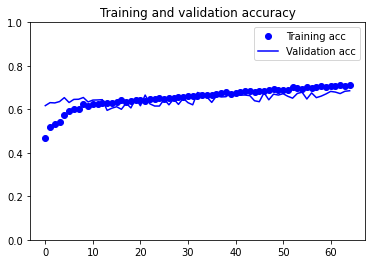

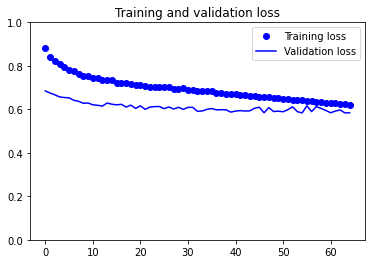

[0 1]
Normalized confusion matrix


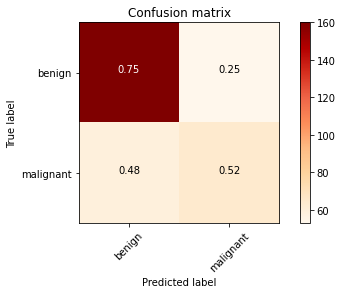

In [ ]:
from tensorflow.keras.applications import VGG16

tf.random.set_seed(7)

#import pretrained model
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.summary()

# Freeze layers
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# add fully connected layers as classifier
VGG16_FT = models.Sequential()
VGG16_FT.add(conv_base)
VGG16_FT.add(layers.Flatten())
VGG16_FT.add(layers.Dense(256, activation='relu'))
VGG16_FT.add(layers.Dropout(rate=.5))
VGG16_FT.add(layers.Dense(256, activation='relu'))
VGG16_FT.add(layers.Dropout(rate=.5))
VGG16_FT.add(layers.Dense(2, activation='sigmoid'))


#optimizers.RMSprop(lr=2e-5)
#'adam'
VGG16_FT.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-6),
              metrics=['accuracy'])

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights = True)


history = VGG16_FT.fit(trainingSet, augmentedLabels, epochs=100, batch_size=32, callbacks=[earlyStopCallback], validation_split=0.2, class_weight = weights)


pred = VGG16_FT.predict_classes(testSet)
print(metrics.classification_report(testLabels, pred))
test_loss, test_acc = VGG16_FT.evaluate(testSet, testLabelsCategorical)
print(test_loss, test_acc)
plot_accurancy_loss(history)
plot_confusionMatrix(VGG16_FT, testSet, testLabels, classes)